In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [21]:
tracks = pd.read_csv('data/audio_features_4.0_clean.csv')

In [22]:
tracks = tracks[tracks.popularity.notnull()]

In [23]:
tracks.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
count,64833.000000,64833.000000,64833.000000,64833.000000,64833.000000,64833.000000,64833.000000,64833.000000,64833.000000,64833.000000,64833.000000,6.483300e+04,64833.000000,64833.000000
mean,0.537831,0.653670,5.285472,-8.751655,0.637376,0.084367,0.285111,0.218827,0.200646,0.479460,122.430895,2.359156e+05,3.906159,26.757639
std,0.182388,0.258794,3.557026,5.234975,0.480761,0.107293,0.334250,0.344237,0.168187,0.271806,29.731044,1.189790e+05,0.410053,19.219658
min,0.056500,0.000204,0.000000,-50.700000,0.000000,0.022000,0.000000,0.000000,0.008230,0.000000,30.497000,1.582500e+04,1.000000,0.000000
25%,0.414000,0.482000,2.000000,-10.780000,0.000000,0.036000,0.005830,0.000002,0.096600,0.247000,99.904000,1.773730e+05,4.000000,10.000000
50%,0.547000,0.704000,5.000000,-7.449000,1.000000,0.048700,0.111000,0.001260,0.130000,0.470000,121.623000,2.180000e+05,4.000000,26.000000
75%,0.675000,0.874000,8.000000,-5.257000,1.000000,0.083900,0.536000,0.410000,0.264000,0.705000,140.042000,2.693870e+05,4.000000,41.000000
max,0.988000,1.000000,11.000000,5.118000,1.000000,0.968000,0.996000,1.000000,0.997000,0.999000,233.574000,4.438214e+06,5.000000,95.000000


In [24]:
# fig = plt.figure(figsize=(10, 10))
tracks.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
danceability,1.000000,0.070292,0.016141,0.214643,-0.048169,0.090316,-0.099977,-0.221442,-0.121929,0.517634,-0.086949,-0.046449,0.162216,0.154072
energy,0.070292,1.000000,0.031135,0.768752,-0.042318,0.132112,-0.742049,-0.141493,0.193054,0.219996,0.242863,-0.003479,0.149693,-0.025508
key,0.016141,0.031135,1.000000,0.021830,-0.145981,0.020803,-0.028117,-0.005069,-0.004591,0.016156,0.010193,-0.003863,0.005095,-0.005482
loudness,0.214643,0.768752,0.021830,1.000000,-0.014112,0.061207,-0.602968,-0.350061,0.079249,0.236951,0.204195,-0.035375,0.154559,0.081576
mode,-0.048169,-0.042318,-0.145981,-0.014112,1.000000,-0.028441,0.048323,-0.048825,0.006644,0.019710,0.006029,-0.040864,-0.007214,-0.002794
speechiness,0.090316,0.132112,0.020803,0.061207,-0.028441,1.000000,0.002040,-0.120323,0.270330,0.018025,0.005859,-0.056651,-0.023358,-0.071601
acousticness,-0.099977,-0.742049,-0.028117,-0.602968,0.048323,0.002040,1.000000,0.093084,-0.066908,-0.101002,-0.218236,-0.060043,-0.157939,-0.018472
instrumentalness,-0.221442,-0.141493,-0.005069,-0.350061,-0.048825,-0.120323,0.093084,1.000000,-0.056201,-0.300380,-0.042287,0.110931,-0.065266,-0.170407
liveness,-0.121929,0.193054,-0.004591,0.079249,0.006644,0.270330,-0.066908,-0.056201,1.000000,-0.017043,0.012918,-0.030504,-0.023188,-0.060283
valence,0.517634,0.219996,0.016156,0.236951,0.019710,0.018025,-0.101002,-0.300380,-0.017043,1.000000,0.076264,-0.140692,0.125151,0.053152


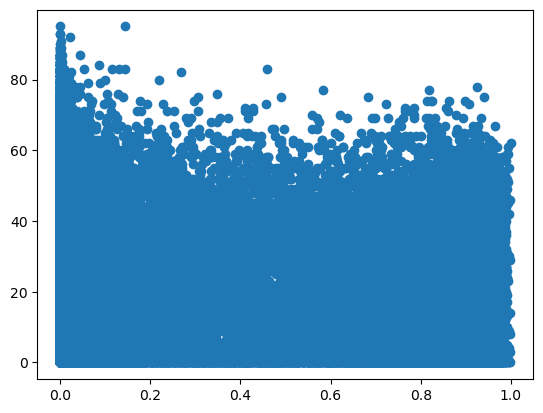

In [25]:
plt.scatter(tracks.instrumentalness, tracks.popularity)
plt.show()

In [26]:
tracks

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_name,song_name,genre,spotify_track_id,popularity
0,0.829,0.435,0.0,-10.136,1.0,0.0515,0.0363,0.881000,0.1190,0.594,103.817,230147.0,4.0,Unknown Mortal Orchestra,So Good At Being in Trouble,Chillwave,2lwi35A2ym3FAmSlvOGnQp,66.0
1,0.956,0.377,6.0,-7.965,1.0,0.0804,0.5660,0.414000,0.3130,0.566,119.993,268333.0,4.0,Unknown Mortal Orchestra,Hunnybee,Chillwave,6AAYNz8jXvVlgG9IpYi42Z,64.0
2,0.764,0.567,6.0,-7.493,1.0,0.0577,0.2410,0.369000,0.3240,0.412,122.513,277987.0,4.0,Unknown Mortal Orchestra,Meshuggah,Chillwave,7FpD6W73sZuEEp4dNRCwy9,57.0
5,0.808,0.741,8.0,-8.160,0.0,0.0570,0.3410,0.034400,0.1100,0.621,126.985,250013.0,4.0,Unknown Mortal Orchestra,Layla,Chillwave,3VZrMjHeYvUrFGKeG7B62D,53.0
11,0.564,0.669,6.0,-8.474,1.0,0.0413,0.0423,0.730000,0.1250,0.306,178.040,250906.0,4.0,Com Truise,Propagation,Chillwave,2MIF5EhJoAZ6cXgMqfAwdw,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550243,0.292,0.188,10.0,-12.503,1.0,0.0282,0.8760,0.000004,0.1150,0.348,84.201,154960.0,4.0,Kit Carson,Band Of Gold - Remastered,Adult Standards,6j8T5yGx0kbn9oVvWNHLXX,4.0
550253,0.353,0.451,9.0,-8.753,1.0,0.0309,0.6180,0.000000,0.2750,0.259,93.561,163800.0,4.0,Art & Dotty Todd,It Could Have Been You and Me,Adult Standards,4FAZAGkZXVyRF9ArquCr6Q,1.0
550273,0.503,0.315,6.0,-9.610,0.0,0.0323,0.4780,0.000000,0.2030,0.400,111.036,108920.0,4.0,Morris Stoloff,You Can't Run Away From It (Main Title),Adult Standards,4WNjJ0IX2Gcuig4UELaAaN,10.0
550278,0.553,0.290,0.0,-13.373,1.0,0.0391,0.8660,0.905000,0.0773,0.644,103.949,165493.0,4.0,Morris Stoloff,Shine on Harvest Moon,Adult Standards,5cKULZvhbmedWy1MaNKJwc,0.0


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have a dataframe named 'df' with columns 'song', 'artist', and 'audio_features'
# Load your data into the dataframe
# df = pd.read_csv('your_data.csv')

# Combine song and artist names into a single text column
tracks['combined_text'] = tracks['song_name'] + ' ' + tracks['artist_name']

# Create a TfidfVectorizer with a reasonable maximum number of features
vectorizer = TfidfVectorizer(max_features=500)

# Fit the vectorizer to the combined_text column and transform the text data into numerical features
text_features = vectorizer.fit_transform(tracks['combined_text'])

# Convert the resulting sparse matrix into a dataframe with appropriate column names
text_features_df = pd.DataFrame(text_features.toarray(), columns=vectorizer.get_feature_names_out())

# Reset the index of both dataframes to avoid index mismatch issues
tracks.reset_index(drop=True, inplace=True)
text_features_df.reset_index(drop=True, inplace=True)

# Concatenate the original dataframe with the new text features dataframe
tracks = pd.concat([tracks, text_features_df], axis=1)

# Drop the original text columns and the combined_text column
tracks = tracks.drop(['song_name', 'artist_name', 'combined_text'], axis=1)

# Now you can use this dataframe with audio features and new text features to train a prediction model.


In [28]:
pd.set_option('display.max_columns', None)
tracks

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,spotify_track_id,popularity,12,about,acid,acoustic,act,adam,after,again,ain,air,al,alex,alive,all,allegro,alone,always,am,american,amor,an,and,angel,angels,another,antonio,ao,are,around,art,as,at,away,baby,back,bad,band,be,beach,beat,beautiful,been,before,believe,ben,best,better,big,bill,billy,black,blind,blood,blue,blues,bobby,body,boy,boys,break,broken,brothers,brown,but,bwv,by,call,can,change,charlie,cheb,child,children,chris,city,club,cold,come,como,con,concerto,control,could,country,crazy,cry,cumbia,cut,da,dan,dance,daniel,dark,dave,david,dawn,day,days,de,dead,death,deep,del,der,des,devil,di,die,digital,dirty,disco,dj,do,dog,don,down,dr,dream,dreams,drive,du,dub,earth,easy,eddie,edit,el,electric,em,en,end,es,est,et,ever,every,everything,extended,eye,eyes,face,fall,falling,family,fear,feat,feel,fire,first,five,fly,for,forever,four,free,friend,friends,from,full,future,gang,garden,george,get,ghost,girl,girls,give,glass,go,god,going,gold,golden,gone,gonna,good,goodbye,got,grace,great,green,grupo,guy,hand,hands,happy,hard,hate,have,he,head,heart,heaven,hell,her,here,hey,high,his,hold,home,hope,hot,house,how,if,ii,iii,il,in,instrumental,into,is,it,iv,jack,james,jazz,je,jean,jeff,jesus,jimmy,joe,john,johnny,johnson,jones,joy,just,keep,kid,kids,kill,kim,king,kings,kiss,know,la,lady,las,last,le,leave,lee,left,les,let,life,light,lights,like,lil,line,little,live,living,ll,lo,lonely,long,look,lord,los,lost,louis,love,low,ma,machine,made,magic,major,make,man,maria,mark,martin,mary,matt,may,mc,me,men,mi,michael,midnight,mike,mind,mine,minor,miss,mix,mixed,money,moon,more,morning,mountain,mr,music,my,myself,na,name,need,never,new,nick,night,no,not,nothing,now,ocean,of,off,oh,old,on,one,only,op,or,orchestra,original,orquesta,our,out,over,own,pain,park,part,party,paul,peace,people,peter,piano,place,por,power,project,pt,quartet,que,queen,radio,rain,ray,re,real,red,remaster,remastered,remember,remix,ride,right,river,road,robert,rock,roll,room,rose,run,ryan,sam,samba,say,scene,scott,se,sea,see,set,she,show,si,side,silence,sin,single,six,sky,sleep,slow,smith,so,solo,something,son,sonata,song,soul,sound,space,st,star,stars,state,stay,steve,still,stone,stop,storm,story,street,su,sugar,suite,summer,sun,sunshine,super,sweet,swing,symphony,take,talk,te,tears,tell,than,that,the,theme,there,they,thing,things,think,this,thomas,three,through,ti,time,times,to,together,tom,tommy,tonight,tony,too,town,track,train,trio,tu,turn,two,un,una,under,up,us,van,ve,version,vida,vivo,vs,waiting,walk,wanna,want,war,was,water,waves,way,we,what,when,where,white,who,why,wild,will,williams,wind,with,without,woman,won,world,ya,years,yo,you,young,your
0,0.829,0.435,0.0,-10.136,1.0,0.0515,0.0363,0.881000,0.1190,0.594,103.817,230147.0,4.0,Chillwave,2lwi35A2ym3FAmSlvOGnQp,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.470219,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.457749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.313367,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [29]:
y = tracks.popularity
X = tracks.loc[:, tracks.columns != 'popularity']
X = X.select_dtypes('number')

In [30]:
X.sample(2)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,12,about,acid,acoustic,act,adam,after,again,ain,air,al,alex,alive,all,allegro,alone,always,am,american,amor,an,and,angel,angels,another,antonio,ao,are,around,art,as,at,away,baby,back,bad,band,be,beach,beat,beautiful,been,before,believe,ben,best,better,big,bill,billy,black,blind,blood,blue,blues,bobby,body,boy,boys,break,broken,brothers,brown,but,bwv,by,call,can,change,charlie,cheb,child,children,chris,city,club,cold,come,como,con,concerto,control,could,country,crazy,cry,cumbia,cut,da,dan,dance,daniel,dark,dave,david,dawn,day,days,de,dead,death,deep,del,der,des,devil,di,die,digital,dirty,disco,dj,do,dog,don,down,dr,dream,dreams,drive,du,dub,earth,easy,eddie,edit,el,electric,em,en,end,es,est,et,ever,every,everything,extended,eye,eyes,face,fall,falling,family,fear,feat,feel,fire,first,five,fly,for,forever,four,free,friend,friends,from,full,future,gang,garden,george,get,ghost,girl,girls,give,glass,go,god,going,gold,golden,gone,gonna,good,goodbye,got,grace,great,green,grupo,guy,hand,hands,happy,hard,hate,have,he,head,heart,heaven,hell,her,here,hey,high,his,hold,home,hope,hot,house,how,if,ii,iii,il,in,instrumental,into,is,it,iv,jack,james,jazz,je,jean,jeff,jesus,jimmy,joe,john,johnny,johnson,jones,joy,just,keep,kid,kids,kill,kim,king,kings,kiss,know,la,lady,las,last,le,leave,lee,left,les,let,life,light,lights,like,lil,line,little,live,living,ll,lo,lonely,long,look,lord,los,lost,louis,love,low,ma,machine,made,magic,major,make,man,maria,mark,martin,mary,matt,may,mc,me,men,mi,michael,midnight,mike,mind,mine,minor,miss,mix,mixed,money,moon,more,morning,mountain,mr,music,my,myself,na,name,need,never,new,nick,night,no,not,nothing,now,ocean,of,off,oh,old,on,one,only,op,or,orchestra,original,orquesta,our,out,over,own,pain,park,part,party,paul,peace,people,peter,piano,place,por,power,project,pt,quartet,que,queen,radio,rain,ray,re,real,red,remaster,remastered,remember,remix,ride,right,river,road,robert,rock,roll,room,rose,run,ryan,sam,samba,say,scene,scott,se,sea,see,set,she,show,si,side,silence,sin,single,six,sky,sleep,slow,smith,so,solo,something,son,sonata,song,soul,sound,space,st,star,stars,state,stay,steve,still,stone,stop,storm,story,street,su,sugar,suite,summer,sun,sunshine,super,sweet,swing,symphony,take,talk,te,tears,tell,than,that,the,theme,there,they,thing,things,think,this,thomas,three,through,ti,time,times,to,together,tom,tommy,tonight,tony,too,town,track,train,trio,tu,turn,two,un,una,under,up,us,van,ve,version,vida,vivo,vs,waiting,walk,wanna,want,war,was,water,waves,way,we,what,when,where,white,who,why,wild,will,williams,wind,with,without,woman,won,world,ya,years,yo,you,young,your
60056,0.162,0.214,9.0,-20.225,0.0,0.0364,0.9770,0.677000,0.093,0.0395,72.268,192903.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0

In [31]:
# sfs = SequentialFeatureSelector(LinearRegression()).fit(X, y)

In [32]:
# X = X.iloc[:, sfs.get_support()]
# print(sfs.get_support())

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=538)

In [34]:
X_train

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,12,about,acid,acoustic,act,adam,after,again,ain,air,al,alex,alive,all,allegro,alone,always,am,american,amor,an,and,angel,angels,another,antonio,ao,are,around,art,as,at,away,baby,back,bad,band,be,beach,beat,beautiful,been,before,believe,ben,best,better,big,bill,billy,black,blind,blood,blue,blues,bobby,body,boy,boys,break,broken,brothers,brown,but,bwv,by,call,can,change,charlie,cheb,child,children,chris,city,club,cold,come,como,con,concerto,control,could,country,crazy,cry,cumbia,cut,da,dan,dance,daniel,dark,dave,david,dawn,day,days,de,dead,death,deep,del,der,des,devil,di,die,digital,dirty,disco,dj,do,dog,don,down,dr,dream,dreams,drive,du,dub,earth,easy,eddie,edit,el,electric,em,en,end,es,est,et,ever,every,everything,extended,eye,eyes,face,fall,falling,family,fear,feat,feel,fire,first,five,fly,for,forever,four,free,friend,friends,from,full,future,gang,garden,george,get,ghost,girl,girls,give,glass,go,god,going,gold,golden,gone,gonna,good,goodbye,got,grace,great,green,grupo,guy,hand,hands,happy,hard,hate,have,he,head,heart,heaven,hell,her,here,hey,high,his,hold,home,hope,hot,house,how,if,ii,iii,il,in,instrumental,into,is,it,iv,jack,james,jazz,je,jean,jeff,jesus,jimmy,joe,john,johnny,johnson,jones,joy,just,keep,kid,kids,kill,kim,king,kings,kiss,know,la,lady,las,last,le,leave,lee,left,les,let,life,light,lights,like,lil,line,little,live,living,ll,lo,lonely,long,look,lord,los,lost,louis,love,low,ma,machine,made,magic,major,make,man,maria,mark,martin,mary,matt,may,mc,me,men,mi,michael,midnight,mike,mind,mine,minor,miss,mix,mixed,money,moon,more,morning,mountain,mr,music,my,myself,na,name,need,never,new,nick,night,no,not,nothing,now,ocean,of,off,oh,old,on,one,only,op,or,orchestra,original,orquesta,our,out,over,own,pain,park,part,party,paul,peace,people,peter,piano,place,por,power,project,pt,quartet,que,queen,radio,rain,ray,re,real,red,remaster,remastered,remember,remix,ride,right,river,road,robert,rock,roll,room,rose,run,ryan,sam,samba,say,scene,scott,se,sea,see,set,she,show,si,side,silence,sin,single,six,sky,sleep,slow,smith,so,solo,something,son,sonata,song,soul,sound,space,st,star,stars,state,stay,steve,still,stone,stop,storm,story,street,su,sugar,suite,summer,sun,sunshine,super,sweet,swing,symphony,take,talk,te,tears,tell,than,that,the,theme,there,they,thing,things,think,this,thomas,three,through,ti,time,times,to,together,tom,tommy,tonight,tony,too,town,track,train,trio,tu,turn,two,un,una,under,up,us,van,ve,version,vida,vivo,vs,waiting,walk,wanna,want,war,was,water,waves,way,we,what,when,where,white,who,why,wild,will,williams,wind,with,without,woman,won,world,ya,years,yo,you,young,your
20868,0.626,0.6450,0.0,-14.313,1.0,0.0373,0.09140,0.792000,0.1120,0.9110,128.115,234360.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,

In [35]:
X_train_scaled = MinMaxScaler().fit_transform(X_train)
X_test_scaled = MinMaxScaler().fit_transform(X_test)

In [36]:
# # 15 mins to train. 79% accuracy -> for loudness.
model = RandomForestRegressor(n_estimators=100, 
                                random_state=538) \
                                .fit(X_train_scaled, y_train)

# model = LassoCV(random_state=538, alphas=np.logspace(-4, 4, 50)).fit(X_train_scaled, y_train)

In [37]:
y_pred = model.predict(X_test_scaled)

# calculate MSE
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# calculate R2
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 331.83824050753435
R-squared: 0.10152706821577373


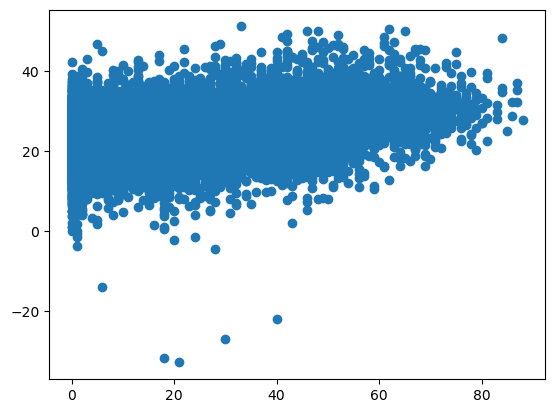

In [38]:
plt.scatter(y_test, y_pred)
plt.show()